<div style = "text-align: center">
<ul><h1 style = "color: blue">Réalisé par : </h1>
    <li><h2>Moustapha DIAGO</h2></li>
    <li><h2>Linda Lamerveille N. T.</h2></li>
</ul>
</div>

<h1 style="text-align: center; color:white;background: black;padding:20px">PARTIE I : Exercices probabilités avancées</h1>

<h1 style="color:#3876db">Exercice 1 : Loi des grands nombres et convergence</h1>

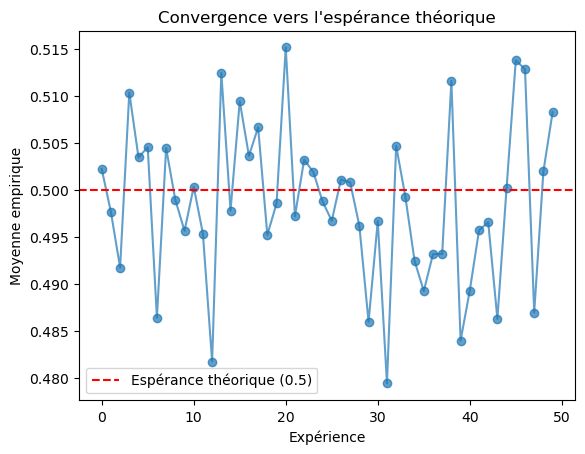

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n = 1000  # Nombre de réalisations
num_experiments = 50  # Nombre de répétitions

# Génération des réalisations
means = []
for i in range(num_experiments):
    X = np.random.uniform(0, 1, n)
    means.append(np.mean(X))

# Convergence théorique
plt.plot(range(num_experiments), means, marker='o', linestyle='-', alpha=0.7)
plt.axhline(y=0.5, color='r', linestyle='--', label="Espérance théorique (0.5)")
plt.xlabel("Expérience")
plt.ylabel("Moyenne empirique")
plt.title("Convergence vers l'espérance théorique")
plt.legend()
plt.show()



<h1 style="color:#3876db">Exercice 2 : Estimation de π par méthode de Monte Carlo</h1>

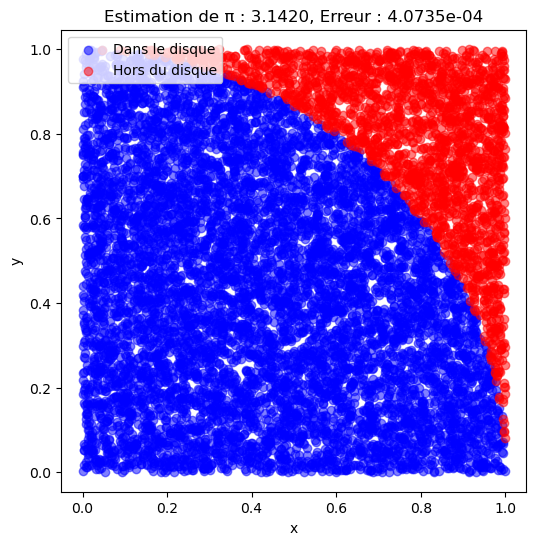

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n = 10000  # Nombre de points

# Génération des points aléatoires dans le carré [0,1] x [0,1]
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

# Comptage des points à l'intérieur du quart de disque
inside = x**2 + y**2 <= 1
pi_estimate = 4 * np.sum(inside) / n

# Calcul de l'erreur
error = abs(np.pi - pi_estimate)

# Affichage des points
plt.figure(figsize=(6,6))
plt.scatter(x[inside], y[inside], color='blue', alpha=0.5, label="Dans le disque")
plt.scatter(x[~inside], y[~inside], color='red', alpha=0.5, label="Hors du disque")
plt.xlabel("x")
plt.ylabel("y") 
plt.axis("equal")
plt.legend()
plt.title(f"Estimation de π : {pi_estimate:.4f}, Erreur : {error:.4e}")
plt.show()


<h1 style="color:#3876db">Exercice 3 : Loi géométrique simulée</h1>

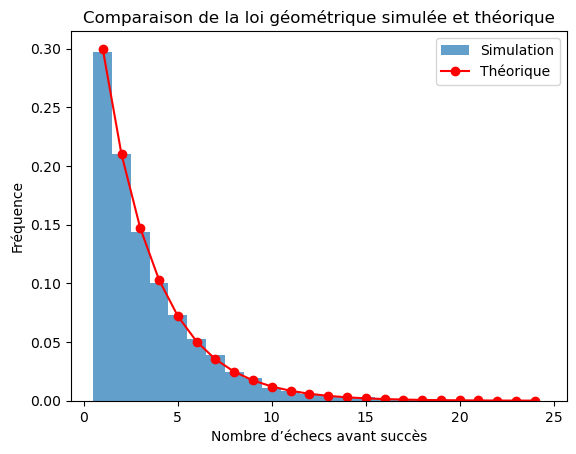

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Paramètres
p = 0.3  # Probabilité de succès
n = 10000  # Nombre de réalisations

# Génération des réalisations suivant une loi géométrique
X = np.random.geometric(p, n)

# Histogramme des fréquences observées
plt.hist(X, bins=np.arange(1, max(X)+2)-0.5, density=True, alpha=0.7, label="Simulation")

# Distribution théorique
x_vals = np.arange(1, max(X)+1)
theoretical_probs = stats.geom.pmf(x_vals, p)
plt.plot(x_vals, theoretical_probs, marker='o', linestyle='-', color='red', label="Théorique")

# Affichage
plt.xlabel("Nombre d’échecs avant succès")
plt.ylabel("Fréquence")
plt.title("Comparaison de la loi géométrique simulée et théorique")
plt.legend()
plt.show()


<h1 style="color:#3876db">Exercice 4 : Somme de variables binomiales</h1>

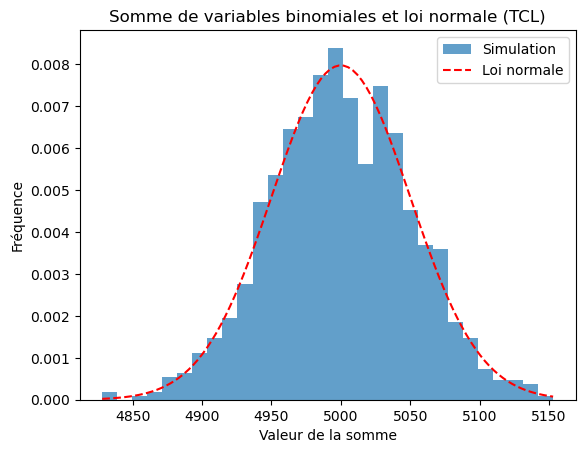

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Paramètres
n = 1000  # Nombre de variables binomiales
N = 10  # Nombre d'essais par variable binomiale
p = 0.5  # Probabilité de succès

# Génération des réalisations
X = np.random.binomial(N, p, (n,))

# Calcul de la somme des variables binomiales
sum_X = np.sum(X)

# Distribution empirique des sommes
sums = [np.sum(np.random.binomial(N, p, n)) for _ in range(1000)]

# Histogramme des sommes
plt.hist(sums, bins=30, density=True, alpha=0.7, label="Simulation")

# Approximation normale (TCL)
mu = n * N * p  # Espérance théorique
sigma = np.sqrt(n * N * p * (1 - p))  # Écart-type théorique
x_vals = np.linspace(min(sums), max(sums), 100)
plt.plot(x_vals, stats.norm.pdf(x_vals, mu, sigma), linestyle='--', color='red', label="Loi normale")

# Affichage
plt.xlabel("Valeur de la somme")
plt.ylabel("Fréquence")
plt.title("Somme de variables binomiales et loi normale (TCL)")
plt.legend()
plt.show()

<h1 style="color:#3876db">Exercice 5 : Chaîne de Markov simple</h1>

In [97]:
import numpy as np

# Définition de la matrice de transition
P = np.array([
    [0.1, 0.6, 0.3], # transitions depuis l' état 0
    [0.4, 0.3, 0.3], # transitions depuis l' état 1
    [0.2, 0.5, 0.3]  # transitions depuis l' état 2
])

In [99]:
# Simulation d'un trajectoire de longueur n
def simulate_markov_chain(P, n, start_state=0):
    """Simule une trajectoire de longueur n (n transitions) à partir de start_state."""
    states = [start_state] # La trajectoire qu'on obtiendra après n transitions
    for _ in range(n):
        current_state = states[-1]
        #À chaque transition, on choisit aléatoirement l'état suivant selon la distribution définie par la ligne courante de P.
        next_state = np.random.choice([0, 1, 2], p=P[current_state])
        states.append(next_state)
    return states

In [101]:
#Estimation empirique de la probabilité d’être dans chaque état après n transitions
def estimate_state_probabilities(P, n, num_simulations=10000, start_state=0):
    """Estime la probabilité d'être dans chaque état après n transitions."""
    counts = np.zeros(3) #[0,0,0]
    for _ in range(num_simulations):
        trajectory = simulate_markov_chain(P, n, start_state)
        final_state = trajectory[-1]
        counts[final_state] += 1
    return counts / num_simulations

<h5>Applications</h5>

In [104]:
#Simulons une trajectoire de dix trasitions avec un état initial égale à 0
simulate_markov_chain(P, 10, 0)

[0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1]

In [106]:
#Calculons les probabilités
n = 10  # nombre de transitions
num_simulations = 10000 #Nombre de simulations de trajectoire
start_state = 0  # état initial

probs = estimate_state_probabilities(P, n, num_simulations, start_state)
for i, p in enumerate(probs):
        print(f"Probabilité d'être dans l'état {i} après {n} transitions : {p:.4f}")

Probabilité d'être dans l'état 0 après 10 transitions : 0.2681
Probabilité d'être dans l'état 1 après 10 transitions : 0.4316
Probabilité d'être dans l'état 2 après 10 transitions : 0.3003


<h1 style="color:#3876db">Exercice 6 : Processus de Poisson</h1>

<h5>Implémentation</h5>

In [109]:
import numpy as np

import matplotlib.pyplot as plt

def simulate_poisson_process(lam, T):
    """
    lam : Taux moyen d'évènements par unités de temps
    T : durée totale de la simulation
    """
    times = []  #Contient les temps d'arrivée
    t = 0
    while t < T:
        # Générer le temps d'attente suivant (les durées qui s’écoulent entre deux événements consécutifs) (distribution exponentielle) 
        inter_arrival = np.random.exponential(1/lam)
        t += inter_arrival  # Calculer les temps d’arrivée
        if t < T:           # Conserver les temps d'arrivées tant qu'elles restent <= T
            times.append(t)
    return np.array(times)

In [110]:
#Grapha du nombre d'évènements en fonction du temps.
def plot_poisson_process(times, T):
    # Nombre d'événements à chaque heure
    event_counts = np.arange(1, len(times)+1)
    plt.step(np.concatenate([[0], times]), np.concatenate([[0], event_counts]), where='post')
    plt.xlabel('Temps')
    plt.ylabel('Nombre d\'événements')
    plt.title('Processus de Poisson')
    plt.xlim(0, T)
    plt.grid(True)
    plt.show()

<h5>Applications</h5>

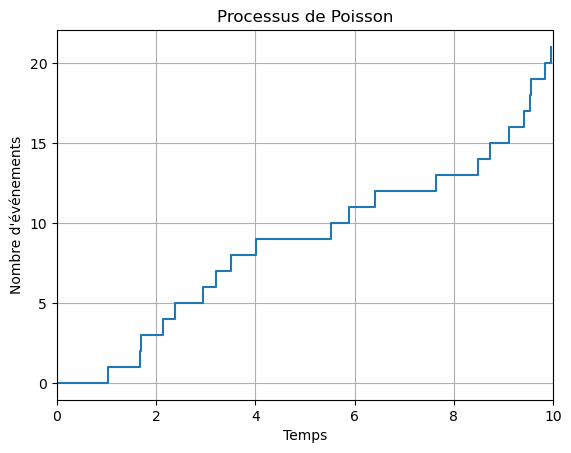

In [115]:
# Paramètres
lam = 2.0  # taux d'arrivée (lambda)
T = 10.0   # intervalle de temps

# Simulation
event_times = simulate_poisson_process(lam, T)

# Affichage
plot_poisson_process(event_times, T)

<h1 style="text-align: center; color:white;background: black;padding:20px">PARTIE II : Exercices Suites Avancées</h1>

<h1 style="color:#3876db">Exercice 8: Suite définie par une intégrale</h1>

In [119]:
from scipy.integrate import quad
from functools import lru_cache 

In [121]:
# Implémentation de la suite définie par l'intégrale
@lru_cache(maxsize=None)  # Cache infini pour mémoriser les appels précédents
def suite(n):
    if n < 0:
        return "Indéterminée"
    if n == 0:
        return 1.0
    # Appel récursif optimisé grâce au cache
    prev = suite(n-1)
    # Intégrande simplifié : on intègre x**(n-1) et multiplie par prev
    resultat = prev * quad(lambda x: x**(n-1), 0, 1)[0]
    return resultat

In [123]:
# Afffichage des dix premiers termes de la suite
print("Les dix premiers termes de la suite définie par l'intégrale sont :")
for i in range(10):
    print(f"U({i}) = {suite(i):.3f}") #Affichage avec trois décimales

Les dix premiers termes de la suite définie par l'intégrale sont :
U(0) = 1.000
U(1) = 1.000
U(2) = 0.500
U(3) = 0.167
U(4) = 0.042
U(5) = 0.008
U(6) = 0.001
U(7) = 0.000
U(8) = 0.000
U(9) = 0.000


<H4><u>La suite semble converger vers 0 </u></H4>

<h1 style="color:#3876db">Exercice 9: Accélération de convergence (méthode d’Aitken)</h1>

<h5>Implémentation de la fonction aitken</h5>

In [128]:
def aitken(u):
    if len(u) < 3:
        return "Nombre de termes insuffisant"
    """
    Accélère la suite u en utilisant la méthode d'Aitken
    Applique la méthode d'Aitken à une liste u des termes u_n de la suite initiale.
    Retourne la suite accélérée sous forme de liste.
    """
    n = len(u)
    accel = [] #Liste pour stocker les termes accélérés
    for i in range(n - 2):   # On boucle sur les indices i tels que i+2 < len(u)
        denom = u[i+2] - 2*u[i+1] + u[i]
        if denom == 0:
            # On ne peut pas accélérer si le dénominateur est nul
            accel.append(None)
        else:
            aitken_val = u[i] - ((u[i+1] - u[i])**2) / denom
            accel.append(aitken_val)
    return accel

<h5>Teste-la sur la suite harmonique</h5>

In [131]:
# Calcul des 10 premiers termes de la suite harmonique
harm = [sum(1/k for k in range(1, n+1)) for n in range(1, 11)]
# Application de la méthode d'Aitken
harm_accel = aitken(harm)

print("Suite harmonique: \n  ", harm,"\n")
print("Suite accélérée de la suite harmonique par Aitken: \n", harm_accel)

Suite harmonique: 
   [1.0, 1.5, 1.8333333333333333, 2.0833333333333335, 2.283333333333333, 2.45, 2.592857142857143, 2.717857142857143, 2.828968253968254, 2.9289682539682538] 

Suite accélérée de la suite harmonique par Aitken: 
 [2.499999999999999, 2.8333333333333375, 3.0833333333333233, 3.2833333333333505, 3.4499999999999864, 3.592857142857146, 3.717857142857147, 3.8289682539682146]


<h5 style= "color:green;">Ces valeurs montrent que la suite accélérée est en fait plus grande que la suite originale (environ la suite harmonique plus 1 pour les premiers termes). Puisque la suite harmonique diverge, la méthode d’Aitken ne permet pas d’obtenir une limite finie dans ce cas : la suite accélérée diverge aussi</h5>

<h1 style="color:#3876db">Exercice 10 : Somme double imbriquée</h1>

<H5>Implémentation de la fonction somme_double</H5>

In [136]:
def somme_double(n):
    s_n = sum(1/(i * j) 
              for i in range(1, n + 1) 
              for j in range(1, i+1)
             )
    return s_n

<H5>Compare avec une approximation de (ln(n))² pour grand n.</H5>

In [139]:
import math
def comparaison(n):
    s = somme_double(n)
    approx = (math.log(n))**2
    print(f"S({n}) = {s}")
    print(f"(ln({n}))^2 = {approx}")
    print(f"Ecart : {abs(s - approx)}")

In [141]:
#Exemple
comparaison(100)

S(100) = 14.27193470534894
(ln(100))^2 = 21.207592441913597
Ecart : 6.935657736564657


<h1 style="color:#3876db">Exercice 11 : Suite générée par fractions continues</h1>

In [144]:
import math
from fractions import Fraction

def convergents_sqrt2(n_terms): 
    """
    Génère les n premiers convergents de la fraction continue de √2.
    Fraction continue : [1; 2, 2, 2, ...]
    """
    # Liste des termes de la fraction continue
    a = [1] + [2] * (n_terms - 1)
    convergents = [] # Liste pour stocker les convergents
    for n in range(n_terms): 
        # Calcul du convergent en partant de la fin
        frac = Fraction(a[n])
        for k in range(n - 1, -1, -1):
            frac = a[k] + Fraction(1, frac)
        convergents.append(frac)
    return convergents

In [146]:
n = 10  # Nombre de convergents à générer
convs = convergents_sqrt2(n)
sqrt2 = math.sqrt(2)
print(f"Valeur réelle de √2 : {sqrt2}\n")
print("n\tConvergent\t\tDécimal\t\t\tErreur absolue")
print("-" * 70)
for i, frac in enumerate(convs):
    decimal = float(frac)
    error = abs(decimal - sqrt2)
    print(f"{i}\t{frac}\t\t\t{decimal:.10f}\t\t\t{error:.2e}")

Valeur réelle de √2 : 1.4142135623730951

n	Convergent		Décimal			Erreur absolue
----------------------------------------------------------------------
0	1			1.0000000000			4.14e-01
1	3/2			1.5000000000			8.58e-02
2	7/5			1.4000000000			1.42e-02
3	17/12			1.4166666667			2.45e-03
4	41/29			1.4137931034			4.20e-04
5	99/70			1.4142857143			7.22e-05
6	239/169			1.4142011834			1.24e-05
7	577/408			1.4142156863			2.12e-06
8	1393/985			1.4142131980			3.64e-07
9	3363/2378			1.4142136249			6.25e-08


<h1 style="color:#3876db">Exercice 14 : Suite aléatoire contrôlée (chaîne de Markov)</h1>

Pour p = 0.5, dernière valeur moyenne : 0.48, variance : 872.41
Pour p = 0.6, dernière valeur moyenne : 201.74, variance : 819.25
Pour p = 0.7, dernière valeur moyenne : 395.20, variance : 654.16


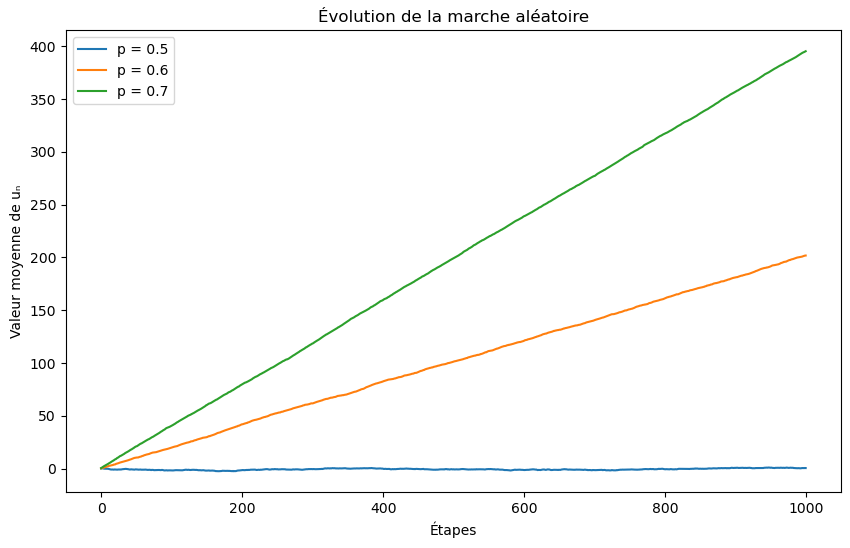

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_steps = 1000  # Nombre de pas
n_experiments = 100  # Nombre d'expériences indépendantes
p_values = [0.5, 0.6, 0.7]  # Différentes valeurs de p

# Simulation
plt.figure(figsize=(10,6))

for p in p_values:
    trajectories = []
    for _ in range(n_experiments):
        X = np.random.choice([-1, 1], size=n_steps, p=[1-p, p])
        U = np.cumsum(X)  # Somme cumulée des déplacements
        trajectories.append(U)
    
    # Calcul de la moyenne et de la variance
    mean_U = np.mean(trajectories, axis=0)
    var_U = np.var(trajectories, axis=0)

    # Affichage
    plt.plot(mean_U, label=f"p = {p}")
    
    print(f"Pour p = {p}, dernière valeur moyenne : {mean_U[-1]:.2f}, variance : {var_U[-1]:.2f}")

plt.xlabel("Étapes")
plt.ylabel("Valeur moyenne de uₙ")
plt.title("Évolution de la marche aléatoire")
plt.legend()
plt.show()